# Exponential Thompson Sampling Experiment

### Import Modules

In [1]:
from thompson_sampling.exponential import ExponentialExperiment
from thompson_sampling.priors import GammaPrior
from pandas import Series

### Create Priors and Instantiate Experiment with Priors

In [2]:
means = Series([.100, .110, .75])
variances = Series([.075, .0200, None])
effective_sizes = Series([None, None, 3])
labels = Series(["option1", "option2", "option3"])

In [3]:
pr = GammaPrior()
pr.add_multiple(means, variances, effective_sizes, labels)
pr.priors

{'option1': {'shape': 0.133, 'scale': 0.75},
 'option2': {'shape': 0.605, 'scale': 0.182},
 'option3': {'shape': 2.25, 'scale': 0.333}}

In [4]:
experiment = ExponentialExperiment(priors = pr)

### Choose arms for the next experiment

In [5]:
experiment.choose_arm()

'option1'

In [6]:
experiment.choose_arm()

'option1'

### Simulate posterior predictive distributions for all labels

In [7]:
experiment.get_ppd(size = 5000) # size is the number of values to simulate for the distributions

[{'Label': 'option1',
  '95% Credible Interval': (0.0, 1394525119952.342),
  'mean': 1.0854895582915409e+33},
 {'Label': 'option2',
  '95% Credible Interval': (0.0, 2204.675),
  'mean': 5690.801},
 {'Label': 'option3', '95% Credible Interval': (0.0, 14.0), 'mean': 2.208}]

We can see the different distributions of the posterior predictives based on the current posterior

### Update the options by providing the rewards


In [19]:
rewards = [{"label":"option1", "reward":150},{"label":"option2", "reward":30},{"label":"option2", "reward":10}]
experiment.add_rewards(rewards)

In [20]:
experiment.get_ppd(size=5000)

[{'Label': 'option1',
  '95% Credible Interval': (3.0, 654.025),
  'mean': 159.186},
 {'Label': 'option2', '95% Credible Interval': (0.0, 81.0), 'mean': 20.539},
 {'Label': 'option3', '95% Credible Interval': (0.0, 11.0), 'mean': 1.852}]

We can see that the percentiles for "option1" and "option2" have changed with the added information

### View distribution of the posteriors

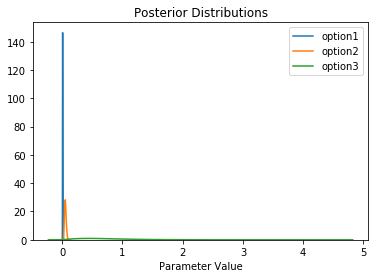

In [21]:
experiment.plot_posterior()

In [26]:
experiment._sample_posterior(size=10, key="option1")

array([0.00819051, 0.00503048, 0.00656725, 0.00921218, 0.01045425,
       0.0055071 , 0.00721851, 0.00596666, 0.01101615, 0.00880809])

In [28]:
experiment._sample_posterior(size=10, key="option3")

array([0.57305717, 0.75094676, 0.54163707, 1.15043149, 0.56943766,
       0.21748846, 0.45894773, 1.58224253, 2.82817551, 1.29309619])

In [29]:
experiment.posteriors

{'option1': {'shape': 6.133, 'scale': 0.0012},
 'option2': {'shape': 12.605, 'scale': 0.0041},
 'option3': {'shape': 2.25, 'scale': 0.333}}